### Feature Selection, Model Selection and Tuning Project - Concrete Strength Prediction
<font color="red">Submitted By: Mayur Makadia</font>

**Github: https://github.com/mayurmakadia1/UTAustin-PGP-AIML/tree/master/2-Supervised-Learning/FMST**

#### Attribute information

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable

## Import required libraries and define common function

In [1311]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

global resultsDf, X_train, X_test, y_train, y_test, X, y

In [1312]:
#function to perform the model training, testing, performance, store in results dataframe and draw the chart showing the regression line
def resultsDFReg(model,algoName,op):
    global resultsDf, X_train, X_test, y_train, y_test, X, y
    
    #train the model
    model.fit(X_train, y_train)
    
    #test the model
    y_pred = model.predict(X_test)

    #performance evaluation
    rmseval = np.sqrt(mean_squared_error(y_test, y_pred))
    mseval = mean_squared_error(y_test, y_pred)
    maeval = mean_absolute_error(y_test, y_pred)
    r2val = r2_score(y_test, y_pred)
    
    #cross validation with 10 folds
    cvmean = cross_val_score(model, X_train, y_train, cv = 10).mean()
    cvstd = cross_val_score(model, X_train, y_train, cv = 10).std()
    print("Cross validation scores:")
    print(cross_val_score(model, X_train, y_train, cv = 10))
    
    #add the results to dataframe for comparison with other models
    if(op=="add"):
        tempResultsDf = pd.DataFrame({'Regression Model':[algoName],'RMSE': [rmseval],'MSE': [mseval], 'MAE': [maeval], 'R2': [r2val], 'CV Mean': [cvmean], 'CV Std': [cvstd]})
        resultsDf = pd.concat([resultsDf, tempResultsDf])
    if(op=="new"):
        resultsDf = pd.DataFrame({'Regression Model':[algoName],'RMSE': [rmseval],'MSE': [mseval], 'MAE': [maeval], 'R2': [r2val], 'CV Mean': [cvmean], 'CV Std': [cvstd]})

    #labels of the results data frame
    resultsDf = resultsDf[['Regression Model', 'RMSE','MSE', 'MAE','R2','CV Mean','CV Std']]
    
    #draw the chart showing the regression line
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(algoName)
    plt.show()

## Deliverable – 1 Exploratory data quality report - 1. Univariate Analysis

In [1313]:
#read the dataset
data_df = pd.read_csv("concrete.csv")

In [1314]:
#quick data review
data_df.head() # To check first 5 rows of data set

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [1315]:
print('===============================================================')
print('Null values:')
print('===============================================================')
print(data_df.isnull().sum())

Null values:
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


#### There are no null values in the data

In [1316]:
print('===============================================================')
print('Shape:')
print('===============================================================')
print(data_df.shape)

Shape:
(1030, 9)


In [1317]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [1318]:
#check data skewness
data_df.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

In [1319]:
print('============================================================================================================')
print('Statistical Summary:')
print('============================================================================================================')
data_df.describe().transpose()

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


### Inferences :
- Cement has min value (102) very near to std deviation (104).
- Slag, ash and superplastic has min value as 0 
- For water std value is less than min value
- Slag, ash and age has mean values greater than median indicating a right skewed data
- Many outliers possible in slag and ash based on Q1 and Q3 values

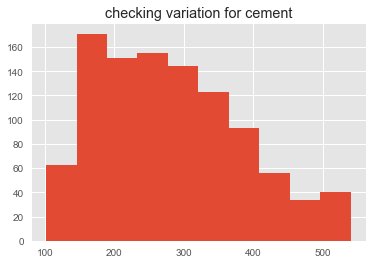

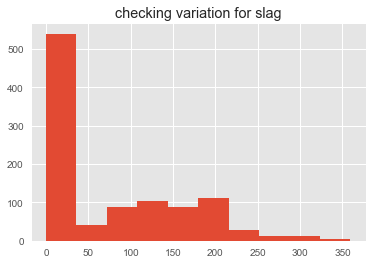

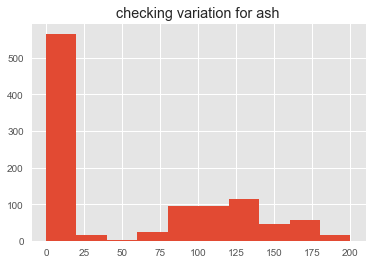

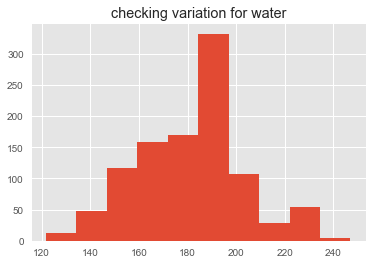

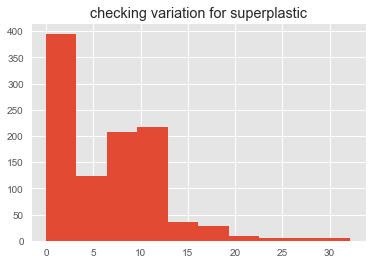

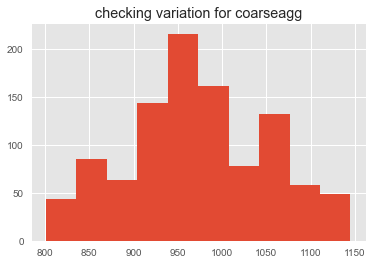

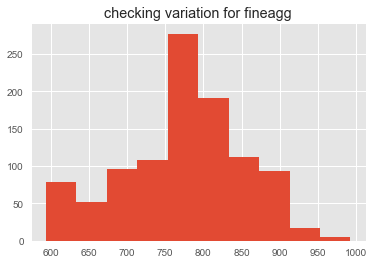

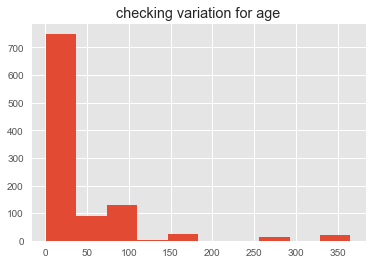

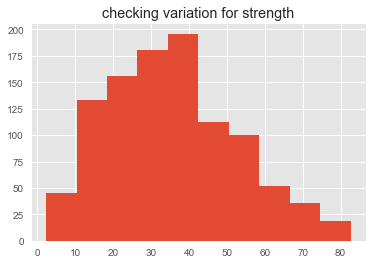

In [1320]:
for g in data_df.select_dtypes(include=['float64','int64']).columns:
    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1=data_df[g].hist(ax=axes)
    f1.title.set_text("checking variation for {}".format(g))

<AxesSubplot:xlabel='strength'>

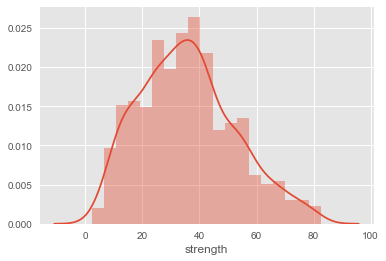

In [1321]:
sns.distplot(data_df['strength'])

## Deliverable – 1 Exploratory data quality report - 2. Bivariate analysis

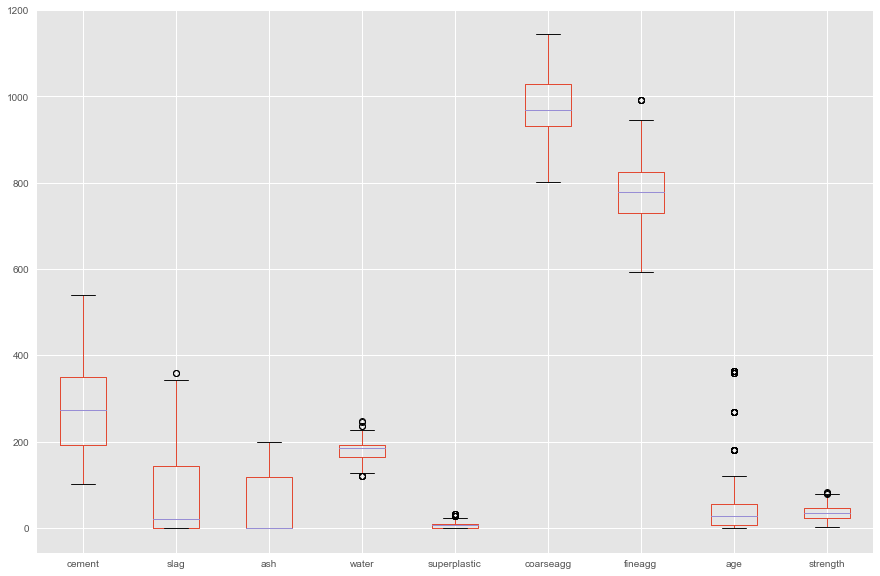

In [1322]:
plt.figure(figsize=(15,10))
data_df.boxplot()
plt.show()

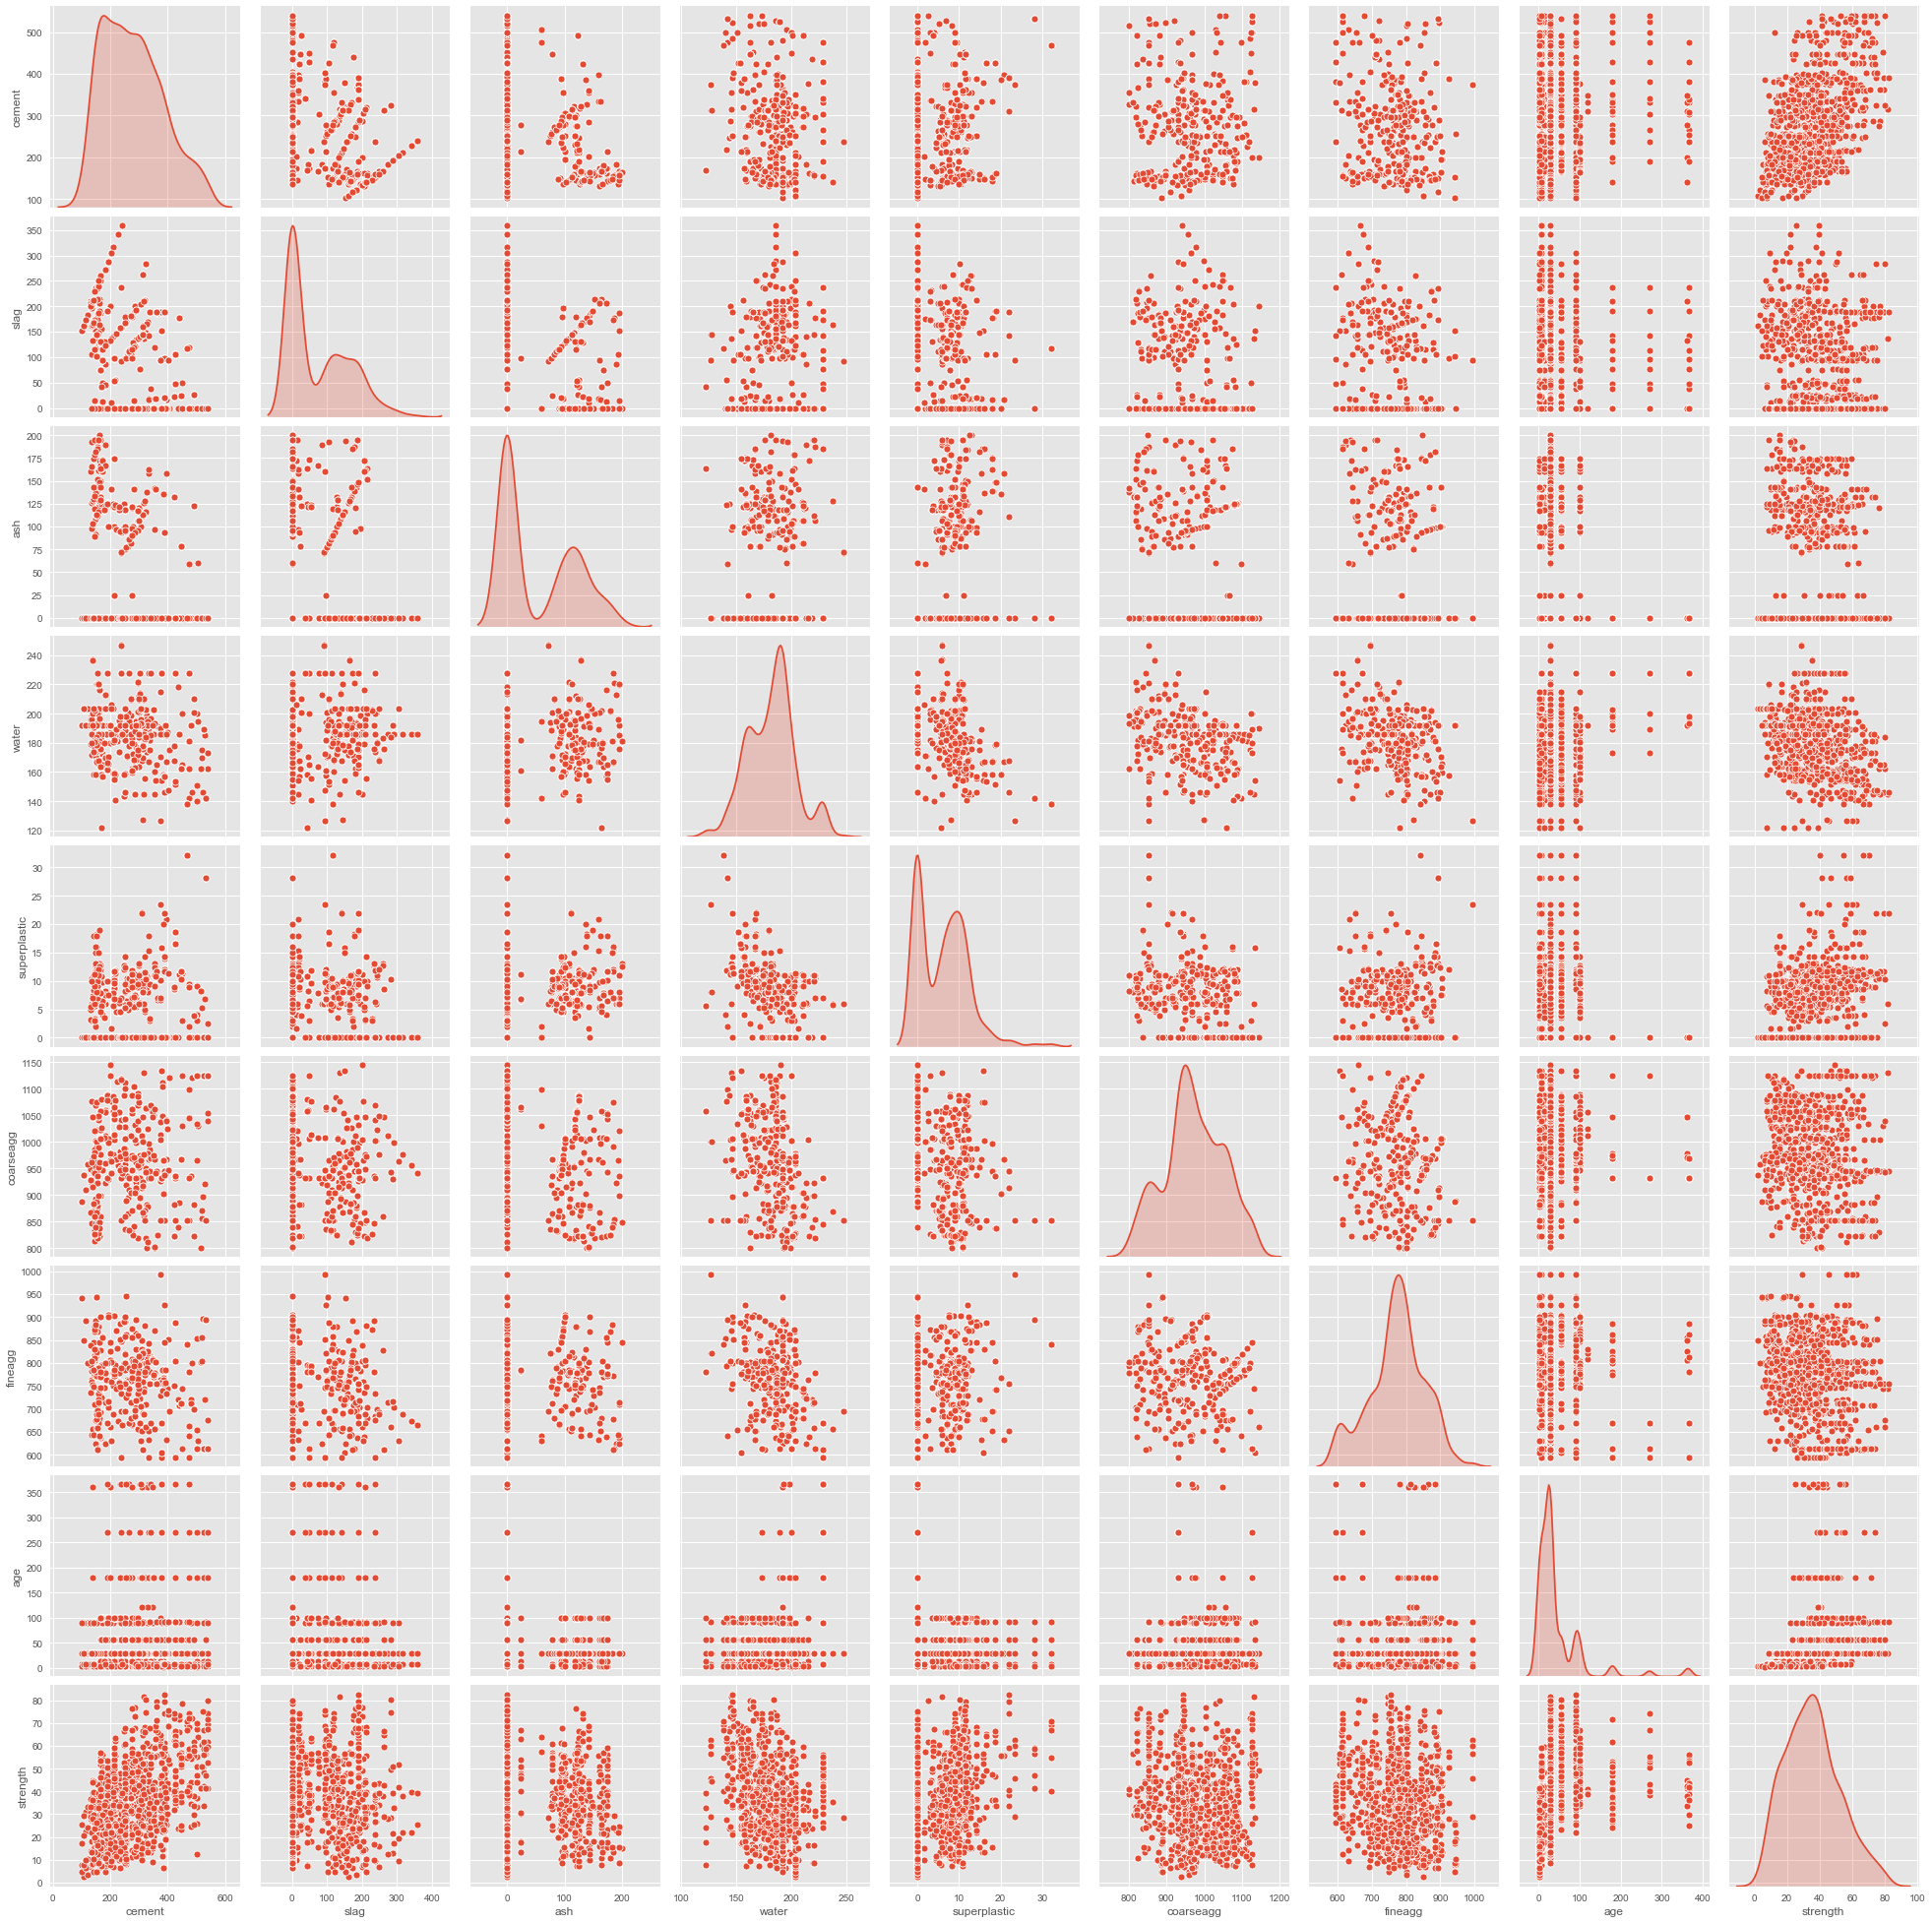

In [1323]:
#sns.pairplot(data_df, height=3, diag_kind='auto', corner=True)
sns.pairplot(data_df, height=3, diag_kind='kde')
plt.show()

#### There seems to be no high correlation between independent variables

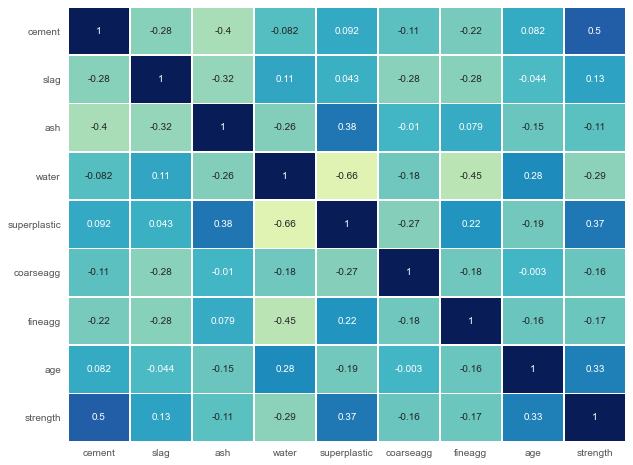

In [1324]:
plt.figure(figsize=(10,8))

sns.heatmap(data_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

- From the correlation data, cement, age and superplastic have good positive correlation with strength
- Cement has the strongest correlation with strength.
- Water has the most negative correlation with strength
- Ash, coarseagg and fineagg has negative correlation with strength

## Deliverable – 1 Exploratory data quality report - 3. Feature Engineering techniques, train & test split

In [1325]:
#perform log transformation of the right skewed data, adding 1 to avoid 0 value issues
data_df['age'] = np.log(data_df['age']+1)
data_df['slag'] = np.log(data_df['slag']+1)
data_df['ash'] = np.log(data_df['ash']+1)

In [1326]:
#review the transformed data skewness
data_df.skew()

cement          0.51
slag           -0.03
ash             0.23
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age            -0.01
strength        0.42
dtype: float64

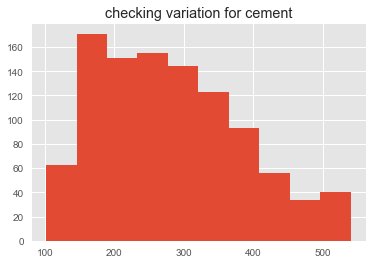

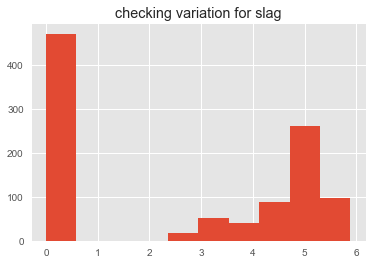

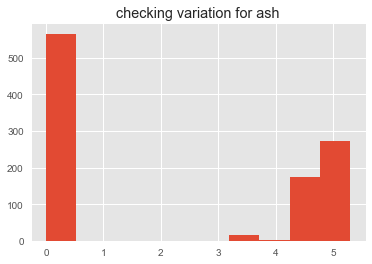

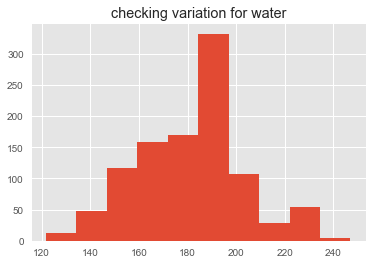

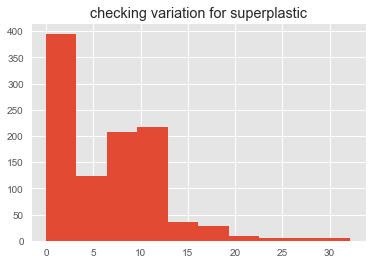

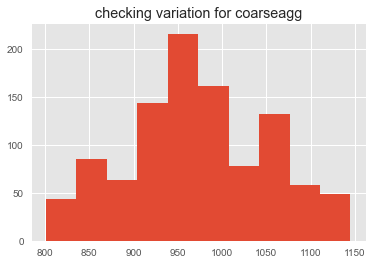

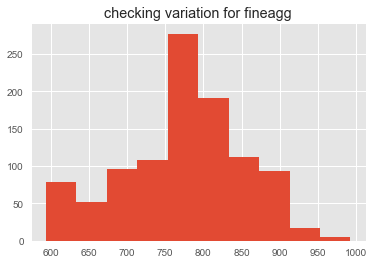

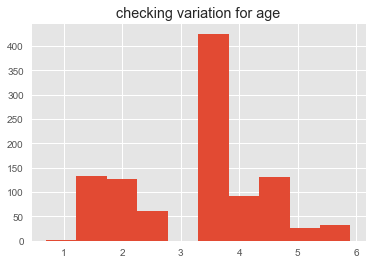

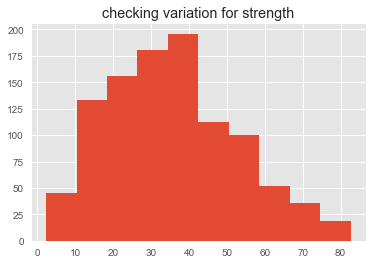

In [1327]:
for g in data_df.select_dtypes(include=['float64','int64']).columns:
    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1=data_df[g].hist(ax=axes)
    f1.title.set_text("checking variation for {}".format(g))

- Define X and Y variables

In [1328]:
#Define X and Y variables
X = data_df.drop("strength" , axis=1)
y = data_df["strength"]

In [1329]:
##Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

##### Split the data into training and test set in the ratio of 70:30 respectively
We will use 70% of data for training and 30% for testing.

Lets check split of data

In [1330]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(X.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(X.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [1331]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.30,5.36,0.00,203.50,0.00,971.80,748.50,3.37
1,168.90,3.77,4.83,158.30,10.80,"1,080.80",796.20,2.71
2,250.00,0.00,4.57,187.40,5.50,956.90,861.20,3.37
3,266.00,4.74,0.00,228.00,0.00,932.00,670.00,3.37
4,154.80,5.22,0.00,193.30,9.10,"1,047.40",696.70,3.37


In [1332]:
y.head()

0   29.89
1   23.51
2   29.22
3   45.85
4   18.29
Name: strength, dtype: float64

In [1333]:
#scaling - standardizing the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1334]:
# Importing linearregression, lasso and ridge models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## Creating the Model and Tuning It - 1: Use multiple algorithms to compare models w.r.t their metrics

Cross validation scores:
[0.80251045 0.78186493 0.73435535 0.78577616 0.82567511 0.80558676
 0.77489989 0.76521398 0.77279782 0.78348126]


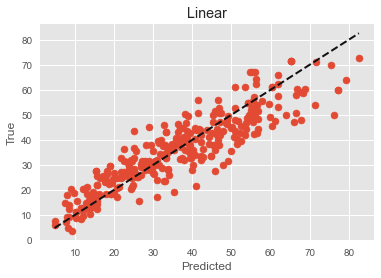

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02


In [1335]:
#Linear Regression Model. Store the accuracy results for each model in a dataframe for final comparison
linReg = LinearRegression()
resultsDFReg(linReg,'Linear','new')
resultsDf

In [1336]:
print ("Linear model coefficients:", (linReg.coef_))

Linear model coefficients: [ 9.69066489  5.60006061  1.90969646 -5.15269726  0.8215692  -0.11494181
 -0.47104521  9.98377866]


Cross validation scores:
[0.79506172 0.74225229 0.71157418 0.74133639 0.80408056 0.7813081
 0.72549403 0.76693743 0.74435975 0.77612105]


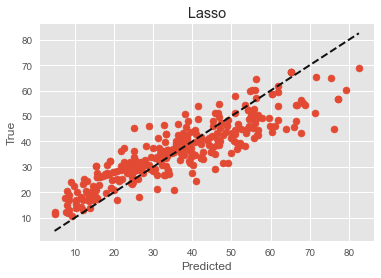

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03


In [1337]:
#Lasso Regression Model. Store the accuracy results for each model in a dataframe for final comparison
lassoReg = Lasso()
resultsDFReg(lassoReg,'Lasso','add')
resultsDf

In [1338]:
print ("Lasso model coefficients:", (lassoReg.coef_))

Lasso model coefficients: [ 7.69515709  3.73507399  0.         -3.58095457  1.84769138 -0.
 -0.          8.70630674]


Cross validation scores:
[0.80272057 0.78163505 0.73460496 0.78548269 0.82548959 0.80553343
 0.77459531 0.76572766 0.77290224 0.7836702 ]


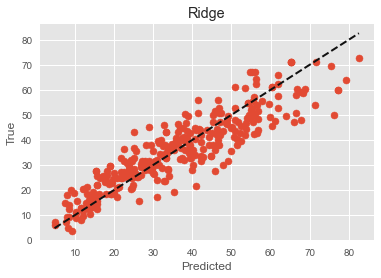

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02


In [1339]:
#Ridge Regression Model.Store the accuracy results for each model in a dataframe for final comparison
ridgeReg = Ridge()
resultsDFReg(ridgeReg,'Ridge','add')
resultsDf

In [1340]:
print ("Ridge model coefficients:", (ridgeReg.coef_))

Ridge model coefficients: [ 9.64241379  5.55593394  1.87238605 -5.15898499  0.84057529 -0.13826498
 -0.49993035  9.96673483]


In [1341]:
#use polynomial features
X_train_temp = X_train.copy()
X_test_temp = X_test.copy()
X_train = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)
X_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)

Cross validation scores:
[0.87209517 0.46387872 0.89587955 0.87082106 0.93388276 0.83539088
 0.88309491 0.91839788 0.80031754 0.88494828]


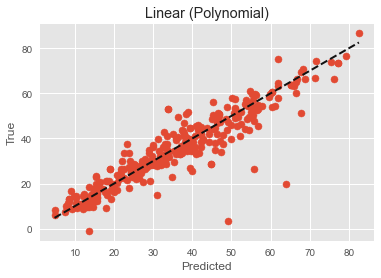

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13


In [1342]:
#Linear Regression Model. Store the accuracy results for each model in a dataframe for final comparison
linReg = LinearRegression()
resultsDFReg(linReg,'Linear (Polynomial)','add')
resultsDf

In [1343]:
print ("Linear model (polynomial) coefficients:", (linReg.coef_))

Linear model (polynomial) coefficients: [ 3.23798632e+01  3.94344473e+00 -1.02362917e+01  7.69841169e+00
 -1.06406515e+00  2.22335559e+01  3.07978279e+01  7.33451743e+00
 -4.74062325e+00 -7.37494654e+00 -5.94034110e+00 -5.70724657e+00
  3.00698970e+00 -7.09327767e+00 -9.64004280e+00 -7.06988403e-01
 -1.89506514e+00 -6.31002325e+00 -5.46211935e+00  2.58130098e+00
 -8.33693993e+00 -8.78297636e+00  7.81033170e-01 -1.67075509e+00
 -2.67206162e+00  2.68886525e+00 -6.55188716e+00 -4.47811176e+00
  1.58522668e-01 -4.38609934e+00 -6.49404154e+00 -1.07252668e+01
 -9.27021093e+00 -1.52696355e+00 -4.72122623e+00  9.07304581e-02
 -1.75100369e+00  6.34007869e-01 -4.53687223e+00 -9.89601579e+00
 -1.72584370e+00 -6.77774694e+00 -7.21119450e-01 -1.06131736e+00
 -8.08302908e-02 -1.87693097e-01 -4.30626647e+00  3.16239499e-01
  7.64760161e-01  1.30908926e+00  9.93825818e-01  1.35648954e+00
 -8.35683340e+00 -3.19656639e+00  1.27070927e+00  7.60770520e-01
  4.90661381e+00  1.90278111e+00  2.42569002e+00 -

Cross validation scores:
[0.80640826 0.78441061 0.78256252 0.77684619 0.82733061 0.78930862
 0.75174524 0.84779769 0.78930756 0.81361276]


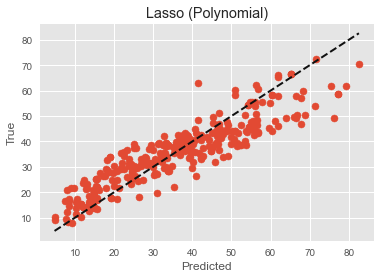

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03


In [1344]:
#Lasso Regression Model. Store the accuracy results for each model in a dataframe for final comparison
lassoReg = Lasso()
resultsDFReg(lassoReg,'Lasso (Polynomial)','add')
resultsDf

In [1345]:
print ("Lasso model (polynomial) coefficients:", (lassoReg.coef_))

Lasso model (polynomial) coefficients: [ 0.49342492  0.          0.         -1.5264998   0.42287909 -0.
 -0.          8.71425058 -0.          0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.          0.          0.04282839 -0.
  0.         -0.11922536  0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.35368249  0.
  0.          0.         -0.          0.          0.         -0.01117529
  0.         -0.62727908  0.98458346  0.         -0.         -0.12268656
 -0.          0.         -0.          0.          1.90375589 -0.18094991
 -0.          0.         -0.          0.         -0.          3.94717451
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.10205456 -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
  0.         -0.          3.36353575  0.         -1.78698614  1.50045691
 -0.       

Cross validation scores:
[0.91304192 0.89200071 0.88205977 0.88703824 0.92631148 0.84224824
 0.88353512 0.93103252 0.88941047 0.88976078]


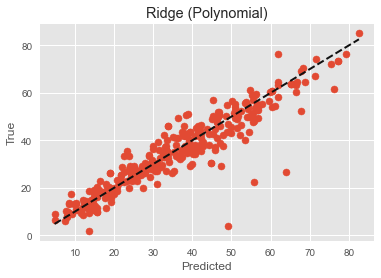

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02


In [1346]:
#Ridge Regression Model.Store the accuracy results for each model in a dataframe for final comparison
ridgeReg = Ridge()
resultsDFReg(ridgeReg,'Ridge (Polynomial)','add')
resultsDf

In [1347]:
print ("Ridge model (polynomial) coefficients:", (ridgeReg.coef_))

Ridge model (polynomial) coefficients: [10.61541066  2.1470079  -4.56527016 -1.75606244 -1.13756005  3.19922564
  2.94398208  7.02198548 -0.53316134  0.13447935 -1.0409775  -1.5900794
  2.77797676  0.80942329  0.24160801  0.04554937  5.76435446 -1.32119324
 -2.35108859  1.84558664 -1.28718217 -0.48178509  1.36972652  5.85292537
 -0.8894439   1.85141626 -1.24263985  1.11163001  0.6478752  -2.22952359
 -3.965844   -5.202077   -3.25417495 -0.9905693  -3.61412743  0.78141899
 -1.37193556  0.64564596 -1.00041118 -0.77479453 -1.19205453 -1.49673311
 -0.05904242 -1.01731682  0.60984653  0.48328063 -2.17167168 -0.59854542
 -0.26465696  0.41595432  0.03230828  0.60937234  0.29259652 -1.05146437
 -1.62062631 -0.58168169  3.92879851  0.53826118  0.93223658  3.45709077
 -1.51164071  1.72047725 -1.78283939 -3.98204087  2.48008011  0.04898116
  1.79484566  0.40394142 -0.31539254  0.72027129 -2.00054751  1.65792072
  2.17911137 -2.96246721  1.55509212  1.31634624  2.69235017  0.1977937
  1.5061889  -

In [1348]:
#switch the train and test set back to original scaled data
X_train = X_train_temp.copy()
X_test = X_test_temp.copy()

Cross validation scores:
[0.94098796 0.87735473 0.88728807 0.91536238 0.8948721  0.86327033
 0.88435468 0.92708498 0.91701557 0.87179044]


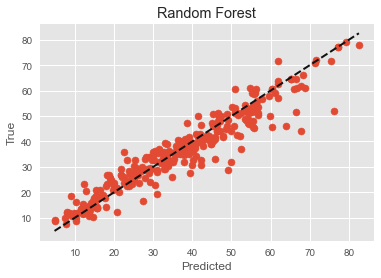

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02
0,Random Forest,5.21,27.10,3.65,0.91,0.90,0.02


In [1349]:
#Random Forest Regression Model.Store the accuracy results for each model in a dataframe for final comparison
from sklearn.ensemble import RandomForestRegressor
rfrReg = RandomForestRegressor()
resultsDFReg(rfrReg,'Random Forest','add')
resultsDf

In [1350]:
#reviewing feature importance
feature_rfr = rfrReg.feature_importances_
print(feature_rfr)

[0.32309388 0.07033033 0.02444378 0.11981543 0.05122784 0.02844721
 0.03638482 0.34625671]


Cross validation scores:
[0.83404055 0.7702999  0.73733236 0.75629902 0.80390598 0.76340708
 0.71426077 0.80130932 0.82233557 0.80010882]


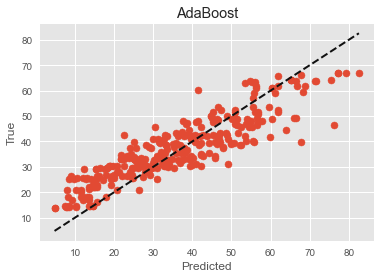

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02
0,Random Forest,5.21,27.10,3.65,0.91,0.90,0.02
0,AdaBoost,8.19,67.07,6.71,0.77,0.78,0.04


In [1351]:
#AdaBoost Regression Model.Store the accuracy results for each model in a dataframe for final comparison
from sklearn.ensemble import AdaBoostRegressor
adaReg = AdaBoostRegressor()
resultsDFReg(adaReg,'AdaBoost','add')
resultsDf

Cross validation scores:
[0.93800648 0.87892348 0.89431218 0.88412466 0.91274526 0.86934948
 0.88423428 0.92952612 0.90505019 0.88431827]


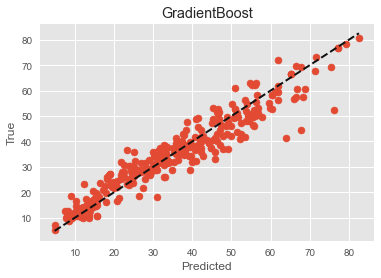

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02
0,Random Forest,5.21,27.10,3.65,0.91,0.90,0.02
0,AdaBoost,8.19,67.07,6.71,0.77,0.78,0.04
0,GradientBoost,5.30,28.11,3.96,0.90,0.90,0.02


In [1352]:
#Gradient Boost Regression Model.Store the accuracy results for each model in a dataframe for final comparison
from sklearn.ensemble import GradientBoostingRegressor
gbrgr = GradientBoostingRegressor()
resultsDFReg(gbrgr,'GradientBoost','add')
resultsDf

Cross validation scores:
[0.9324479  0.85928986 0.85940202 0.90081797 0.87650643 0.87777292
 0.84378193 0.91919551 0.91115292 0.86468377]


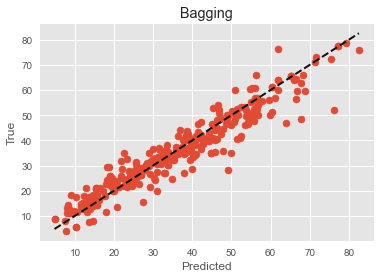

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02
0,Random Forest,5.21,27.10,3.65,0.91,0.90,0.02
0,AdaBoost,8.19,67.07,6.71,0.77,0.78,0.04
0,GradientBoost,5.30,28.11,3.96,0.90,0.90,0.02
0,Bagging,5.18,26.84,3.75,0.91,0.88,0.03


In [1353]:
#Bagging Regression Model.Store the accuracy results for each model in a dataframe for final comparison
from sklearn.ensemble import BaggingRegressor
bgrgr = BaggingRegressor()
resultsDFReg(bgrgr,'Bagging','add')
resultsDf

## <font color=red>Before performing GridSearchCV hyperparameter tuning, Random Forest is performing best with R-square score of 0.91, RMSE 5.21 and cross validation score of 0.90. Gradient Boost and Bagging scores are equally good as well.</font>

## Model Metrics Comparison Charts

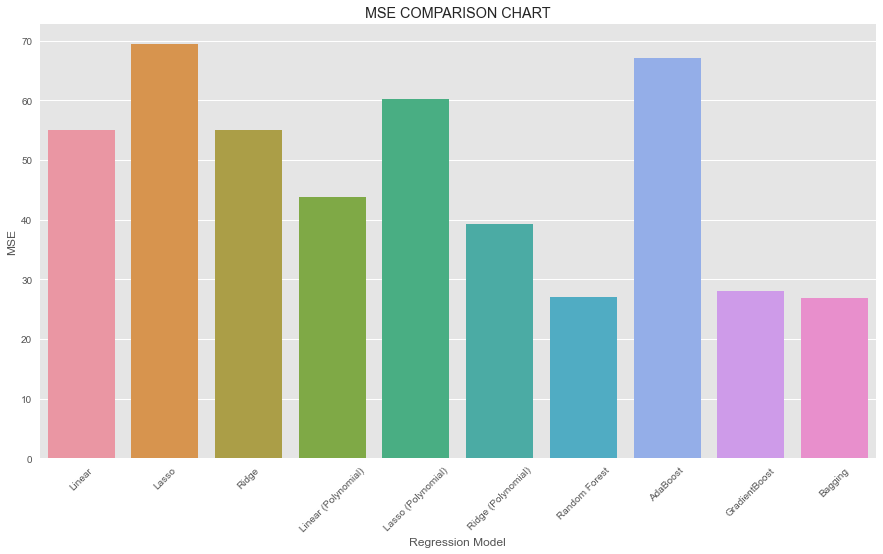

In [1354]:
#K Fold Cross Validation score comparison of different models
plt.figure(figsize=(15,8))
plt.title('MSE COMPARISON CHART')
sns.barplot(x="Regression Model", y="MSE", data=resultsDf)
plt.xticks(rotation=45)
plt.show()

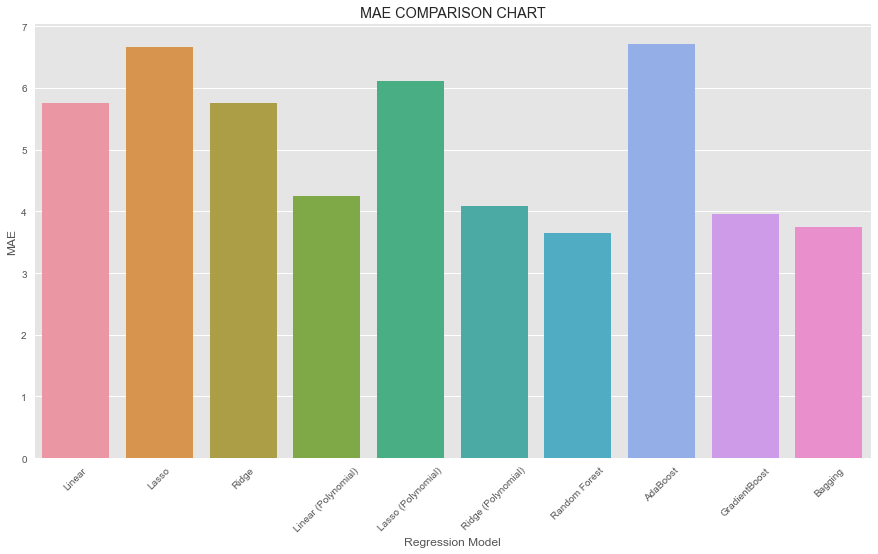

In [1355]:
#K Fold Cross Validation score comparison of different models
plt.figure(figsize=(15,8))
plt.title('MAE COMPARISON CHART')
sns.barplot(x="Regression Model", y="MAE", data=resultsDf)
plt.xticks(rotation=45)
plt.show()

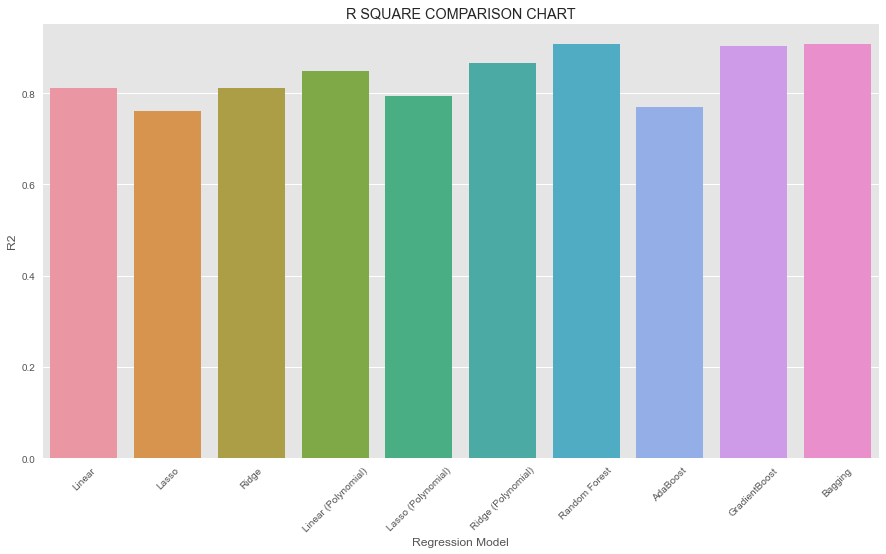

In [1356]:
#R square comparison of different models
plt.figure(figsize=(15,8))
plt.title('R SQUARE COMPARISON CHART')
sns.barplot(x="Regression Model", y="R2", data=resultsDf)
plt.xticks(rotation=45)
plt.show()

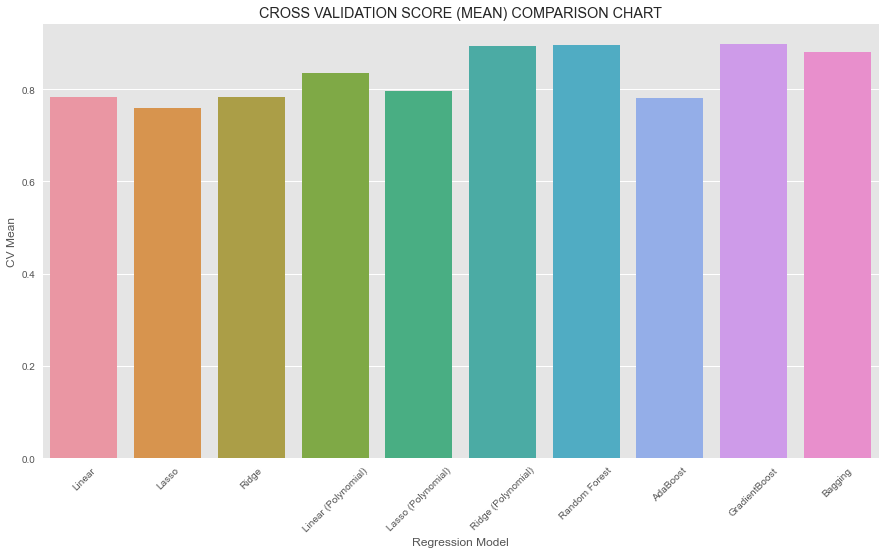

In [1357]:
#K Fold Cross Validation score comparison of different models
plt.figure(figsize=(15,8))
plt.title('CROSS VALIDATION SCORE (MEAN) COMPARISON CHART')
sns.barplot(x="Regression Model", y="CV Mean", data=resultsDf)
plt.xticks(rotation=45)
plt.show()

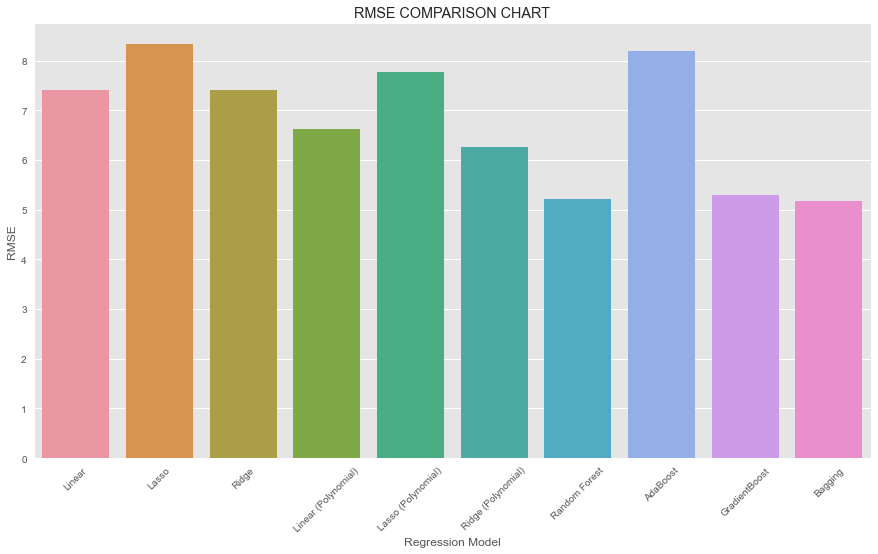

In [1358]:
#K Fold Cross Validation score comparison of different models
plt.figure(figsize=(15,8))
plt.title('RMSE COMPARISON CHART')
sns.barplot(x="Regression Model", y="RMSE", data=resultsDf)
plt.xticks(rotation=45)
plt.show()

## Creating the Model and Tuning It - 2: Perform GridSearchCV On Random Forest, Gradient Boost and AdaBoost to find the best parameters

In [1359]:
#perform the GridSearchCV to get the best parameter set
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [75,100,125,150,175,200],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [75,100,125,150,175,200]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 10, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   19.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   42.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed:  5.5min finished


{'bootstrap': True,
 'max_depth': 150,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 175}

Cross validation scores:
[0.94006772 0.86847416 0.88705405 0.91265561 0.89804009 0.85953922
 0.87967276 0.92634001 0.91712861 0.87213204]


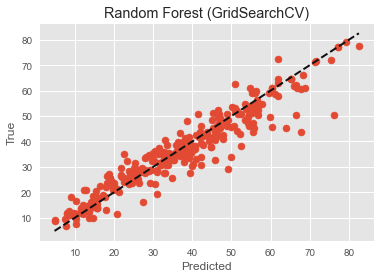

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02
0,Random Forest,5.21,27.10,3.65,0.91,0.90,0.02
0,AdaBoost,8.19,67.07,6.71,0.77,0.78,0.04
0,GradientBoost,5.30,28.11,3.96,0.90,0.90,0.02
0,Bagging,5.18,26.84,3.75,0.91,0.88,0.03


In [1360]:
#execute the random forest model with best parameter set
rfrReg = RandomForestRegressor(
 bootstrap = True,
 max_depth = 150,
 max_features = 'auto',
 min_samples_leaf = 1,
 n_estimators = 175)
resultsDFReg(rfrReg,'Random Forest (GridSearchCV)','add')
resultsDf

#### <font color=green>Random Forest regression R-square, RMSE and Cross Validation score stayed almost the same after using the best parameters from the results of GridSearchCV.</font>

In [1361]:
#execute the Gradient Boost model with best parameter set
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.1,0.25,0.5,0.75,1],
 }
clf = GridSearchCV(GradientBoostingRegressor(), param_grid= parameters, cv=10, n_jobs=4)
clf.fit(X,y)
clf.best_params_

{'learning_rate': 0.25, 'n_estimators': 190}

Cross validation scores:
[0.96726686 0.90553229 0.91067835 0.91504074 0.92910555 0.87548977
 0.91927334 0.94288781 0.93834405 0.89695889]


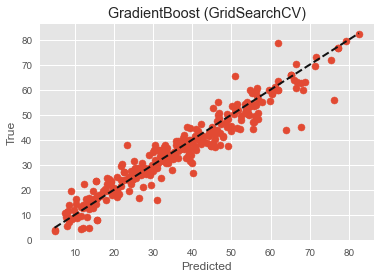

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02
0,Random Forest,5.21,27.10,3.65,0.91,0.90,0.02
0,AdaBoost,8.19,67.07,6.71,0.77,0.78,0.04
0,GradientBoost,5.30,28.11,3.96,0.90,0.90,0.02
0,Bagging,5.18,26.84,3.75,0.91,0.88,0.03


In [1362]:
#execute the AdaBoost model with best parameter set
gdB = GradientBoostingRegressor(learning_rate=0.25,
 n_estimators= 190)
resultsDFReg(gdB,'GradientBoost (GridSearchCV)','add')
resultsDf

#### <font color=red>Gradient Boost performance improved after using the best parameters from the results of GridSearchCV.</font>

In [1363]:
#execute the AdaBoost model with best parameter set
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.1,0.25,0.5,0.75,1],
 }
clf = GridSearchCV(AdaBoostRegressor(), param_grid= parameters, cv=10, n_jobs=4)
clf.fit(X,y)
clf.best_params_


{'learning_rate': 1, 'n_estimators': 120}

Cross validation scores:
[0.8302573  0.7751661  0.75500793 0.76270259 0.77924993 0.77119817
 0.73056925 0.79495941 0.83394659 0.80120319]


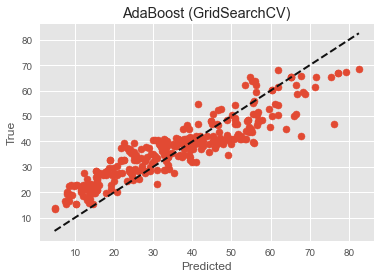

,Regression Model,RMSE,MSE,MAE,R2,CV Mean,CV Std
0,Linear,7.42,55.00,5.75,0.81,0.78,0.02
0,Lasso,8.33,69.45,6.66,0.76,0.76,0.03
0,Ridge,7.42,55.02,5.75,0.81,0.78,0.02
0,Linear (Polynomial),6.62,43.77,4.25,0.85,0.84,0.13
0,Lasso (Polynomial),7.76,60.23,6.12,0.79,0.80,0.03
0,Ridge (Polynomial),6.27,39.27,4.09,0.87,0.89,0.02
0,Random Forest,5.21,27.10,3.65,0.91,0.90,0.02
0,AdaBoost,8.19,67.07,6.71,0.77,0.78,0.04
0,GradientBoost,5.30,28.11,3.96,0.90,0.90,0.02
0,Bagging,5.18,26.84,3.75,0.91,0.88,0.03


In [1364]:
#execute the AdaBoost model with best parameter set
adaB = AdaBoostRegressor(learning_rate=1,
 n_estimators= 120)
resultsDFReg(adaB,'AdaBoost (GridSearchCV)','add')
resultsDf

#### <font color=green>Random forest regression performance stayed almost the same after using the best parameters from the results of GridSearchCV.</font>

#### <font color=green>AdaBoost regression R-square increased from 0.77 to 0.79, RMSE decreased from 8.19 to 7.88 and Cross Validation score stayed the same after using the best parameters from the results of GridSearchCV.</font>

#### <font color=red>GradientBoost regression R-square increased from 0.90 to 0.92, RMSE decreased from 5.30 to 4.72 and Cross Validation score increased from 0.90 to 0.92 after using the best parameters from the results of GridSearchCV.</font>

## <font color=red>After GridSearchCV hyperparameter tuning, Gradient Boost regression performed the best with R-square score of 0.92 and RMSE 4.72.</font>